In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from scipy.stats import chisquare

%matplotlib inline

In [3]:
####Pull data####
df_2 = pd.read_excel('PS2_Q1_Data.xlsx',sheet_name= 'K = 2')
df_5 = pd.read_excel('PS2_Q1_Data.xlsx',sheet_name= 'K = 5')

column_names_2 = ['obs','S1','S2']
column_names_5 = ['obs','S1','S2','S3','S4','S5']

df_2.columns = column_names_2
df_5.columns = column_names_5


### Part A
The asymptotic distribution of the means is given by,
$$\sqrt{n}(\bar X - \mu) \to N(0,1)$$
Therefore, under $H_0: \mu = 0$ the test statistic with a sample size of $N=100$ is $t=10 \bar x$.

In [4]:
#testing the first dataset with 2 samples
t2_S1, t2_S2 = 10*df_2.mean()[1],10*df_2.mean()[2]

#calculate p_values
p2_t1 = 1-norm.cdf(abs(t2_S1))
p2_t2 = 1-norm.cdf(abs(t2_S2))

print('p-value from the database with two samples')
print('p-value for K=1 is',str(round(p2_t1,3)))
print('p-value for K=2 is',str(round(p2_t2,3)))


#testing the first dataset with 2 samples
t5_S1, t5_S2, t5_S3, t5_S4, t5_S5 = 10*df_5.mean()[1], 10*df_5.mean()[2], 10*df_5.mean()[3], 10*df_5.mean()[4], 10*df_5.mean()[5]

#calculate p_values
p5_t1 = 1-norm.cdf(abs(t5_S1))
p5_t2 = 1-norm.cdf(abs(t5_S2))
p5_t3 = 1-norm.cdf(abs(t5_S3))
p5_t4 = 1-norm.cdf(abs(t5_S4))
p5_t5 = 1-norm.cdf(abs(t5_S5))

print('-------')
print('p-value from the database with five samples')
print('p-value for K=1 is',str(round(p5_t1,3)))
print('p-value for K=2 is',str(round(p5_t2,3)))
print('p-value for K=3 is',str(round(p5_t3,3)))
print('p-value for K=4 is',str(round(p5_t4,3)))
print('p-value for K=5 is',str(round(p5_t5,3)))

p-value from the database with two samples
p-value for K=1 is 0.246
p-value for K=2 is 0.434
-------
p-value from the database with five samples
p-value for K=1 is 0.403
p-value for K=2 is 0.108
p-value for K=3 is 0.204
p-value for K=4 is 0.22
p-value for K=5 is 0.199


### Part B

#### Part a
Let $\bar X = [\bar X_1, \dots, \bar X_S]'$ be a vector of the means of the different samples. Since $X_{i,s} \sim iid$ for all $i$ and $s$, $Cov(X_{i,k},X_{i,j})=0<\infty$ for $k\neq j$ and $Var(X_{i,k})=1$ for all $i$ and $k$. Then by the multivariate central limit theorem,
$$\sqrt{N}(\bar X - \mu)\to N(0,I_S) \implies (\bar X - \mu)'N(\bar X - \mu) \to \chi^2_S$$
Therefore, we can use the asymptotic result above to jointly test for the means being zero. More specifically, under the null,$H_0: \mu_1 = \dots = \mu_S = 0$,
$$T_n = 100\sum_{k=1}^S \bar X_k^2 \to \chi_S^2$$

In [5]:
#calculate the test statistic for the two samples
c1 = 100*(df_2.mean()[1]**2 + df_2.mean()[2]**2)
c2 = 100*(df_5.mean()[1]**2 + df_5.mean()[2]**2 + df_5.mean()[3]**2 + df_5.mean()[4]**2 + df_5.mean()[5]**2)

#calculate p_values
p2_c = 1-norm.cdf(c1)
p5_c = 1-norm.cdf(c2)

print('p-value from the joint test for the two samples is',str(round(p2_c,3)))
print('p-value from the joint test for the five samples is',str(round(p5_c,4)))

p-value from the joint test for the two samples is 0.309
p-value from the joint test for the five samples is 0.0002


#### Part b
Under the null $H_0: \mu_1 = \dots = \mu_S = 0$ we have that the mean of the k-th samples is distributed $\sqrt{n}\bar X_k \sim N(0,1)$. Let the cdf of this distrbution be given by $F(x)$. Then we have that the $\max\{\bar X_k\}_{k=1}^K$'s cdf is given by,
$$F_{max}(x) = \Phi(x)^{K}\implies \text{p-value} = 1-\Phi(x)^{K}$$
We can use the sample maxes to evalulate p-values, and hence test the null.

In [11]:
#order statistic test for data set with two samples
p2_o = 1 - norm.cdf(10*max(df_2.mean()[1:3]))**2
p5_o = 1 - norm.cdf(10*max(df_5.mean()[1:6]))**5

print('p-value from the joint n-th order statistic test for the two samples is',str(round(p2_o,3)))
print('p-value from the joint n-th order statistic test for the five samples is',str(round(p5_o,3)))

p-value from the joint n-th order statistic test for the two samples is 0.811
p-value from the joint n-th order statistic test for the five samples is 0.67


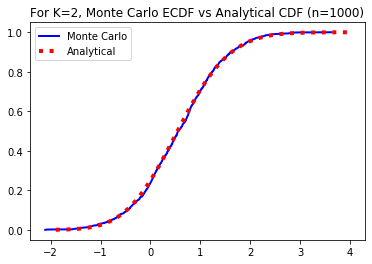

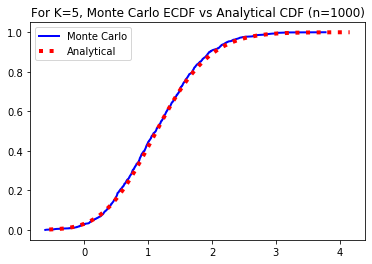

In [7]:
###Monte Carlo Simulation generating the cdf of the test statistic
draws = 1000
values_2 = np.empty(draws)
values_5 = np.empty(draws)

#generate draws
for d in range(draws):
    values_2[d] = max(np.random.standard_normal(2))
    values_5[d] = max(np.random.standard_normal(5))

#prepare data to plot empirical cdf
values_2.sort()
values_5.sort()
ecdf = np.linspace(0, 1,draws)

#prepare anlaytical cdf values for comparision
x2_values = np.linspace(values_2[0]*0.9,values_2[draws-1]*1.1,1000)
x5_values = np.linspace(values_5[0]*0.9,values_5[draws-1]*1.1,1000)
y2_values = [norm.cdf(x)**2 for x in x2_values]
y5_values = [norm.cdf(x)**5 for x in x5_values]

#plot for K=2 sample
fig, ax = plt.subplots()
ax.plot(values_2, ecdf, linewidth=2,alpha=1,label = 'Monte Carlo',color='blue')
ax.plot(x2_values, y2_values, linewidth=4,alpha=1,label = 'Analytical',color='red',linestyle=':')
ax.set_title('For K=2, Monte Carlo ECDF vs Analytical CDF (n=1000)')
ax.legend(loc="best")
plt.show()

#plot for K=5 sample
fig, ax = plt.subplots()
ax.plot(values_5, ecdf, linewidth=2,alpha=1,label = 'Monte Carlo',color='blue')
ax.plot(x5_values, y5_values, linewidth=4,alpha=1,label = 'Analytical',color='red',linestyle=':')
ax.set_title('For K=5, Monte Carlo ECDF vs Analytical CDF (n=1000)')
ax.legend(loc="best")
plt.show()

#### Part c

Holm (1979) provides a step-down testing method. The procedure works as follows,
1. Rank the individual p-values from smallest to largest $p_{n,(1)}\leq \dots \leq p_{n,(S)}$ with corresponding nulls $H_{0,(1)},\dots,H_{0,(n)}$.
1. Then, $H_{0,(s)}$ is rejected $\iff$ $p_{n,(j)}\leq \alpha/(S-j+1)$ for $j=1,\dots,s$.

The method starts with testing the most significant hypothesis by comparing its p-value to $\alpha/S$. If the hypothesis is rejected, the method moves on to the second most significant hypothesis by comparing its p-value to $\alpha/(S-1)$, and so on, until the procedure comes to a stop.

In [8]:
#Choose significance level
α = 0.05

#####implements for sample with two means
#put all the p_values into panda df tracking test,p-value, rejected or accepted column to be filled later
d = {'test': ['t test K=1','t test K=2','F-test','Order Statistic test'], 'p-values': [p2_t1, p2_t2, p2_c, p2_o]}
df2_pvalues = pd.DataFrame(data=d)

#sort p-values in asscending order
df2_pvalues = df2_pvalues.sort_values(by='p-values').reset_index(drop=True)
S = df2_pvalues.shape[0]
pvalues2 = df2_pvalues['p-values']
test2 = df2_pvalues['test']

r = 0
print('-----Step-down testing for sample with two means at the',str(α*100),'% significance level-----')
for s in range(S):
    if pvalues2[s]<= α/(S-s) and r==0:
        print('Reject null of',test2[s])
    else:
        r=1
        print('Cannot reject null of',test2[s])

#####implements for sample with five means
#put all the p_values into panda df tracking test,p-value, rejected or accepted column to be filled later
d = {'test': ['t test K=1','t test K=2','t test K=3','t test K=4','t test K=5','F-test','Order Statistic test'], 'p-values': [p5_t1, p5_t2, p5_t3, p5_t4, p5_t5, p5_c, p5_o]}
df5_pvalues = pd.DataFrame(data=d)

#sort p-values in asscending order
df5_pvalues = df5_pvalues.sort_values(by='p-values').reset_index(drop=True)
S = df5_pvalues.shape[0]
pvalues5 = df5_pvalues['p-values']
test5 = df5_pvalues['test']

r = 0
print('')
print('-----Step-down testing for sample with five means at the',str(α*100),'% significance level-----')
for s in range(S):
    if pvalues5[s]<= α/(S-s) and r==0:
        print('Reject null of',test5[s])
    else:
        r=1
        print('Cannot reject null of',test5[s])

-----Step-down testing for sample with two means at the 5.0 % significance level-----
Cannot reject null of t test K=1
Cannot reject null of F-test
Cannot reject null of t test K=2
Cannot reject null of Order Statistic test

-----Step-down testing for sample with five means at the 5.0 % significance level-----
Reject null of F-test
Cannot reject null of t test K=2
Cannot reject null of t test K=5
Cannot reject null of t test K=3
Cannot reject null of t test K=4
Cannot reject null of t test K=1
Cannot reject null of Order Statistic test


### Part E
For the meta-analysis, I conduct two analysis. The first assumes we have access to all the underlying data, whereas the second assumes we just have access to the means.

#### Meta-analysis if observations are available
In this case it makes sense to just pool all the observations and then do a z-test on the null $\mu =0$. From part a we know that under the null,
$$Z = \sqrt{n}\bar X \to N(0,1)$$

In [9]:
#testing the first dataset with 2 samples
z2 = (200**0.5)*(0.5*df_2.mean()[1] + 0.5*df_2.mean()[2])
z5 = (500**0.5)*(0.2*df_5.mean()[1] + 0.2*df_5.mean()[2] + 0.2*df_5.mean()[3] + 0.2*df_5.mean()[4] + 0.2*df_5.mean()[5])

#calculate p_values
print('p-value for meta-anlaysis when all observation are availble')
print('p-value for database with two samples',str(round(1-norm.cdf(abs(z2)),3)))
print('p-value for database with five samples',str(round(1-norm.cdf(abs(z5)),3)))

p-value for meta-anlaysis when all observation are availble
p-value for database with two samples 0.273
p-value for database with five samples 0.397


#### Meta-analysis if just means are available
Under the null each mean is distributed $\sqrt{100}\bar X \sim N(0,1)$. Therefore the sum of $S$ means are distrbuted $\sqrt{100}\sum_{i=1}^S \bar X_i \sim N(0,S)$. We can use this to construct the following z-test,
$$Z = \sqrt{\frac{100}{S}}\sum_{i=1}^S \bar X_i \sim N(0,1)$$

In [10]:
z2 = (50**0.5)*(df_2.mean()[1] + df_2.mean()[2])
z5 = (20**0.5)*(df_5.mean()[1] + df_5.mean()[2] + df_5.mean()[3] + df_5.mean()[4] + df_5.mean()[5])

#calculate p_values
print('p-value for meta-anlaysis when only means are availble')
print('p-value for database with two samples',str(round(1-norm.cdf(abs(z2)),3)))
print('p-value for database with five samples',str(round(1-norm.cdf(abs(z5)),3)))

p-value for meta-anlaysis when only means are availble
p-value for database with two samples 0.273
p-value for database with five samples 0.397
